# Importing relevant libraries

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastbook
fastbook.setup_book()

In [3]:
from fastbook import *
import pathlib

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import imutils
from fastai.imports import *
from fastai.vision import *
from fastai.vision.models import *
from fastai.torch_basics import *
from fastai.data.core import *
from fastai.data.load import *
from fastai.data.external import *
from fastai.data.transforms import *

In [5]:
PATH = "../asl_alphabet_train"
sz=224
files = os.listdir(PATH) 

In [6]:
files.remove('.DS_Store')

In [7]:
labels_name = []
for i in files:
    labels_name.append('Class: '+ i)
len(labels_name)

29

# Classes visualization

In [8]:
def plots(ims, figsize=(12,6), rows=3, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows+1, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

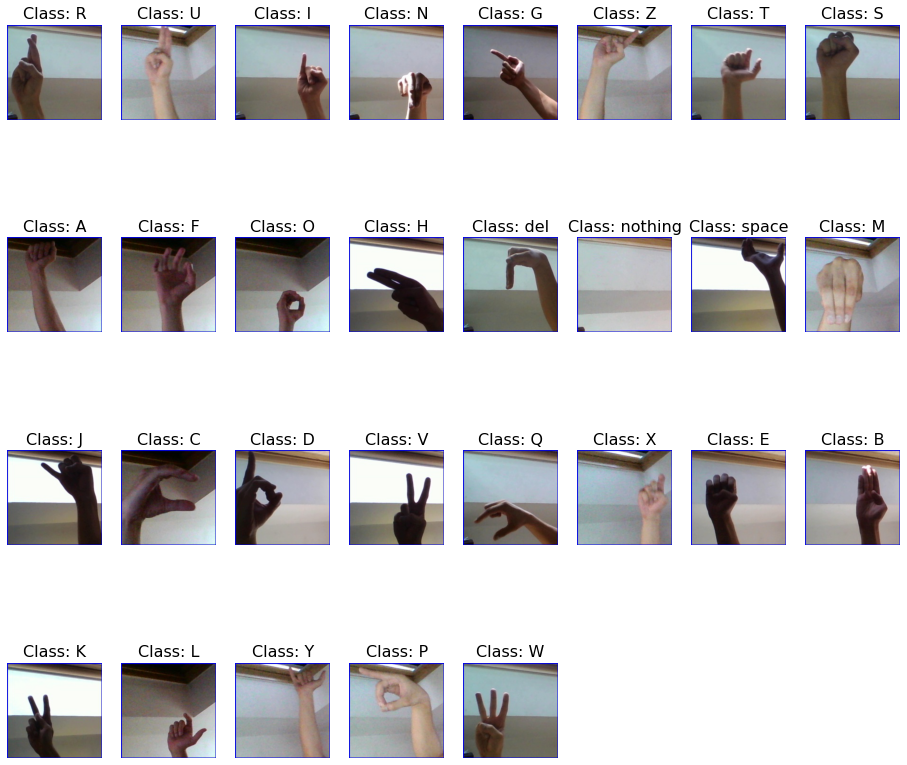

In [9]:
imgs = []
for i in files:
    file = os.listdir(PATH + '/'+ i)
    img = plt.imread(PATH + '/' + i + '/' + file[6])
    imgs.append(img)

plots(imgs, titles=labels_name, rows=4, figsize=(16,15))

## Open CV code:

In [10]:
# path to local asl dataset
PATH = "../asl_alphabet_train"
fnames = get_image_files(PATH)
def label_func(x): return x.parent.name

In [11]:
from PIL import Image
# ../exported_model --- alternate model

# path to the resnet model in local
PATH2 = '../export.pkl'

# loading our resnet 50 model
learn_inf = load_learner(PATH2, cpu=True)

In [12]:
# predictor for each image
def predict(img):
    l,p,j=learn_inf.predict(PILImage.create(img))
    return l,j[p].item()*100

In [13]:
# testing our model on a test image
prediction, idx, probability = learn_inf.predict('/Users/ruffner/Documents/Texas Files/Cognitive Computing/Project/A_test.jpg')

print(prediction)
print(idx)
print(probability)

A
tensor(0)
tensor([1.0000e+00, 6.0195e-19, 7.3773e-16, 1.4376e-15, 1.2488e-11, 2.2343e-13, 4.4877e-16, 1.1815e-16, 9.8273e-17, 8.5136e-19, 3.3903e-14, 2.0114e-12, 1.8207e-12, 2.8005e-18, 4.2523e-15, 1.7052e-17,
        4.2847e-17, 1.4387e-16, 9.6942e-12, 1.1042e-09, 1.6506e-18, 6.9744e-17, 2.5323e-18, 2.7005e-13, 1.0091e-15, 1.0385e-11, 4.3000e-16, 2.2254e-19, 1.6930e-18, 1.2229e-13, 1.4677e-13, 1.1114e-13,
        1.2379e-13, 1.2674e-13, 1.4421e-13, 1.4472e-13, 1.4152e-13, 1.3856e-13, 1.0732e-13, 1.3321e-13, 1.0871e-13, 9.9108e-14, 1.0628e-13, 1.1277e-13, 1.3588e-13, 1.3463e-13, 1.0480e-13, 1.4828e-13,
        1.4097e-13, 1.6880e-13, 1.6809e-13, 1.4586e-13, 1.4587e-13, 1.3116e-13, 1.2753e-13, 1.2633e-13, 1.0696e-13, 1.2271e-13, 1.2555e-13, 1.1661e-13, 1.2446e-13, 1.2227e-13, 1.3736e-13, 1.3880e-13,
        1.2244e-13, 1.3068e-13, 1.1121e-13, 1.3958e-13, 1.3700e-13, 1.4538e-13, 1.0005e-13, 1.4512e-13, 1.0565e-13, 8.7905e-14, 9.3093e-14, 1.1283e-13, 1.1466e-13, 1.0053e-13, 1.0089e-13, 

In [15]:
# importing OpenCV
import cv2

# initiate video capture
cap=cv2.VideoCapture(0) 

#saving all the captured frames to a video file called 'live prediction'
# out=cv2.VideoWriter('try.avi',cv2.VideoWriter_fourcc(*'MJPG'),10, (192*4,108*4)) 
       
while(True):
    ret,img=cap.read() # grabbing each frame of webcam footage
    img = cv2.resize(img,(192*4,108*4)) # resizing frame size, must match video output frame size
    cv2.rectangle(img, (32,32),(432,432),(0,255,0),2) # adding a rectangle to the image
    frame=cv2.resize(img[32:432,32:432],(200,200))
    pred,percent=predict(frame)
    print(pred) # live prediction of frame
    print(percent) # confidence
    cv2.putText(img,'{} {:.2f}% res50'.format(pred,percent),(25,25),cv2.FONT_HERSHEY_SIMPLEX,0.9,(80,255,255),1)
#     out.write(img) # output frame
  
    if cv2.waitKey(1) & 0xFF == ord('q'): # hot key to stop the video capture
        break

cap.release()
cv2.destroyAllWindows()

nothing
85.86025834083557


nothing
85.34975051879883


nothing
78.79050970077515


nothing
91.24122858047485


nothing
86.57013773918152


nothing
88.37258815765381


nothing
71.67818546295166


nothing
82.4712872505188


nothing
94.06096339225769


nothing
90.18970131874084


nothing
97.10345268249512


nothing
97.3554253578186


nothing
97.06733822822571


nothing
96.83138132095337


nothing
96.95245027542114


nothing
92.8071677684784


nothing
93.74884366989136


nothing
98.4675943851471


nothing
97.9820728302002


nothing
97.32236862182617


nothing
98.67762923240662


nothing
99.07421469688416


nothing
99.0624725818634


nothing
97.518789768219


nothing
97.83180952072144


nothing
71.18147611618042


nothing
96.73513770103455


nothing
89.41119313240051


nothing
93.21033954620361


nothing
90.57719111442566


nothing
99.70999956130981


nothing
99.20557141304016


nothing
93.79789233207703


nothing
79.92562651634216


nothing
83.12288522720337


nothing
99.840646982193


nothing
97.52869606018066


nothing
96.91733121871948


nothing
98.49594235420227


nothing
96.64915204048157


nothing
92.03928709030151


nothing
76.36825442314148


nothing
74.35235977172852


nothing
77.76535749435425


nothing
85.24644374847412


nothing
90.90977907180786


nothing
78.27088832855225


nothing
78.6447286605835


nothing
77.78977155685425


nothing
94.37454342842102


nothing
79.3861985206604


nothing
79.47994470596313


nothing
84.15039777755737


nothing
88.4399950504303


nothing
76.03710889816284


nothing
81.82909488677979


nothing
71.5441882610321


nothing
91.57971143722534


nothing
74.14882779121399


nothing
83.9427649974823


nothing
79.30533289909363


nothing
78.595370054245


nothing
63.139528036117554


nothing
85.35918593406677


nothing
74.7971773147583


nothing
87.04378604888916


nothing
86.38688325881958


nothing
85.89211702346802


nothing
86.82245016098022


nothing
83.3298921585083


nothing
81.29973411560059


nothing
87.66879439353943


nothing
91.61695837974548


nothing
82.10243582725525


nothing
80.44064044952393


nothing
99.72496628761292


nothing
99.4045078754425


nothing
97.60748744010925


nothing
96.60347104072571


nothing
96.5691089630127


nothing
96.98625802993774


nothing
97.77906537055969


nothing
96.95703387260437


nothing
96.74800038337708


nothing
97.35620617866516


nothing
97.76028990745544


nothing
98.95603656768799


nothing
98.05861115455627


nothing
99.50804710388184


nothing
99.25745725631714


nothing
99.0362286567688


nothing
81.0492992401123


nothing
63.50947618484497


nothing
73.05192351341248


nothing
96.90169095993042


N
26.845693588256836


nothing
21.997514367103577


nothing
51.56532526016235


nothing
92.821204662323


nothing
52.38695740699768


N
38.931283354759216


nothing
42.79404282569885


nothing
39.80885148048401


nothing
44.531893730163574


N
43.797433376312256


N
35.68795025348663


N
39.202868938446045


nothing
99.98210072517395


nothing
99.97344613075256


nothing
99.81967806816101


nothing
99.78016018867493


nothing
99.43509101867676


N
71.0052490234375


N
93.77349019050598


N
88.23581337928772


S
22.842270135879517


Q
22.47842848300934


S
56.19891285896301


F
68.57047080993652


S
22.507344186306


N
26.290810108184814


S
39.03814256191254


S
31.24314546585083


S
37.59719431400299


S
30.769729614257812


N
56.51004910469055


S
55.37910461425781


N
40.76347053050995


N
35.95983386039734


N
65.55509567260742


S
22.535908222198486


N
36.510953307151794


N
27.402350306510925


S
43.1353896856308


S
29.376909136772156


N
29.642945528030396


S
45.328930020332336


S
25.259706377983093


S
39.88402783870697


S
42.4307256937027


S
36.83937191963196


F
30.146437883377075


S
24.473701417446136


N
20.67534327507019


S
17.020951211452484


F
39.601972699165344


P
22.03679233789444


S
23.7603098154068


F
29.16463315486908


F
20.85566073656082


F
25.500431656837463


F
34.137338399887085


F
30.181819200515747


F
53.95536422729492


Q
30.130016803741455


N
39.794692397117615


Q
39.684703946113586


P
25.38657784461975


F
35.889506340026855


F
34.84126031398773


Q
25.52103102207184


Q
34.95255708694458


Q
33.62017273902893


Q
29.144391417503357


P
19.52771693468094


P
28.97818386554718


Q
24.410060048103333


N
27.37117111682892


Q
24.28620010614395


P
29.572930932044983


F
19.764141738414764


F
17.309340834617615


P
24.258887767791748


S
17.981162667274475


Q
21.206532418727875


F
26.415088772773743


Q
35.10193228721619


Q
40.28620421886444


KeyboardInterrupt: 